In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
df_train = pd.read_excel('Datasets/Data_Train.xlsx')

In [43]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [44]:
df_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [45]:
df_train.isnull().sum().sort_values()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
Route              1
Total_Stops        1
dtype: int64

In [46]:
df_train.dropna(inplace=True)

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [48]:
df_train['Price'].mean()

9087.21456656057

# Data Analysis

In [49]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Date of Journey**

In [50]:
df_train['journey_day'] = pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [51]:
df_train['journey_month'] = pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [52]:
df_train = df_train.drop('Date_of_Journey',axis=1)

**Departure time**

In [53]:
df_train['Dep_min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute
df_train['Dep_hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour

df_train = df_train.drop('Dep_Time',axis=1)

**Arrival TIme**

In [54]:
df_train['Arrival_min'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute
df_train['Arrival_hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_day'] = pd.to_datetime(df_train['Arrival_Time']).dt.day

df_train = df_train.drop('Arrival_Time',axis=1)

**Duration**

In [55]:
# converting all values in Hour-min formate

Duration = list(df_train['Duration'])

for i in range(len(Duration)):
    if len(Duration[i].split()) != 2:
        if 'h' in Duration[i]:
            Duration[i] = Duration[i] +" 0m"
        else:
            Duration[i] = "0h " + Duration[i]

In [56]:
# creating seprate minute and Hour column for Duration taken
Duration_hour = []
Duration_min = []

for i in range(len(Duration)):
    Duration_min.append(int(Duration[i].split(sep=' ')[1].split(sep='m')[0]))
    Duration_hour.append(int(Duration[i].split(sep='h')[0]))

In [57]:
df_train['Duration_min'] = Duration_min
df_train['Duration_hour'] = Duration_hour

In [58]:
df_train = df_train.drop('Duration',axis=1)

**Total Stops**

In [59]:
stops = list(df_train['Total_Stops'])

for i in range(len(stops)):
    if stops[i] != 'non-stop':
        stops[i] = int(stops[i].split()[0])
    else:
        stops[i] = 0

In [60]:
df_train["Total_Stops"] = stops

## Categorial Data

In [61]:
df_train = df_train.drop('Additional_Info',axis=1)

In [62]:
df_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [63]:
df_train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [64]:
df_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [65]:
cols = ['Airline','Source','Destination']

categorial_data = pd.get_dummies(data=df_train[cols])

In [66]:
df_train = df_train.drop(cols,axis=1)

In [67]:
df_train = pd.concat([df_train,categorial_data],axis=1)

In [68]:
df_train.shape

(10682, 35)

In [69]:
df_train = df_train.drop('Route',axis=1)

In [70]:
pd.set_option('display.max_rows',None)
df_train.head()

,Total_Stops,Price,journey_day,journey_month,Dep_min,Dep_hour,Arrival_min,Arrival_hour,Arrival_day,Duration_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,20,22,10,1,22,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,50,5,15,13,22,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,25,9,25,4,10,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,5,18,30,23,22,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,50,16,35,21,22,45,...,0,0,0,0,0,0,0,0,0,1


In [71]:
df_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_min',
       'Dep_hour', 'Arrival_min', 'Arrival_hour', 'Arrival_day',
       'Duration_min', 'Duration_hour', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

# EDA on Test Data

In [72]:
df_test = pd.read_excel('Datasets/Test_set.xlsx')

In [73]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [75]:
# PreProcessing 

# Journey Date
df_test['journey_day'] = pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y').dt.day
df_test['journey_month'] = pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y').dt.month
df_test = df_test.drop('Date_of_Journey',axis=1)

# Departure Time
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test = df_test.drop('Dep_Time',axis=1)

# Arrival Time 
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test['Arrival_hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_day'] = pd.to_datetime(df_test['Arrival_Time']).dt.day

df_test = df_test.drop('Arrival_Time',axis=1)

# Duration 
# converting all values in Hour-min formate
Duration = list(df_test['Duration'])

for i in range(len(Duration)):
    if len(Duration[i].split()) != 2:
        if 'h' in Duration[i]:
            Duration[i] = Duration[i] +" 0m"
        else:
            Duration[i] = "0h " + Duration[i]
# creating seprate minute and Hour column for Duration taken
Duration_hour = []
Duration_min = []

for i in range(len(Duration)):
    Duration_min.append(int(Duration[i].split(sep=' ')[1].split(sep='m')[0]))
    Duration_hour.append(int(Duration[i].split(sep='h')[0]))
    
df_test['Duration_min'] = Duration_min
df_test['Duration_hour'] = Duration_hour
df_test = df_test.drop('Duration',axis=1)

# total Stops
stops = list(df_test['Total_Stops'])
for i in range(len(stops)):
    if stops[i] != 'non-stop':
        stops[i] = int(stops[i].split()[0])
    else:
        stops[i] = 0
        
df_test["Total_Stops"] = stops

df_test = df_test.drop('Additional_Info',axis=1)

cols = ['Airline','Source','Destination']

categorial_data = pd.get_dummies(data=df_test[cols])

df_test = df_test.drop(cols,axis=1)

df_test = pd.concat([df_test,categorial_data],axis=1)

df_test = df_test.drop('Route',axis=1)

df_test.head()

,Total_Stops,journey_day,journey_month,Dep_min,Dep_hour,Arrival_min,Arrival_hour,Arrival_day,Duration_min,Duration_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,30,17,25,4,7,55,10,...,0,1,0,0,0,1,0,0,0,0
1,1,12,5,20,6,20,10,22,0,4,...,0,0,1,0,1,0,0,0,0,0
2,1,21,5,15,19,0,19,22,45,23,...,0,1,0,0,0,1,0,0,0,0
3,1,21,5,0,8,0,21,22,0,13,...,0,1,0,0,0,1,0,0,0,0
4,0,24,6,55,23,45,2,25,50,2,...,0,0,0,0,0,0,1,0,0,0


In [76]:
df_test.columns

Index(['Total_Stops', 'journey_day', 'journey_month', 'Dep_min', 'Dep_hour',
       'Arrival_min', 'Arrival_hour', 'Arrival_day', 'Duration_min',
       'Duration_hour', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

# Preprocessing and feature selection

<AxesSubplot:>

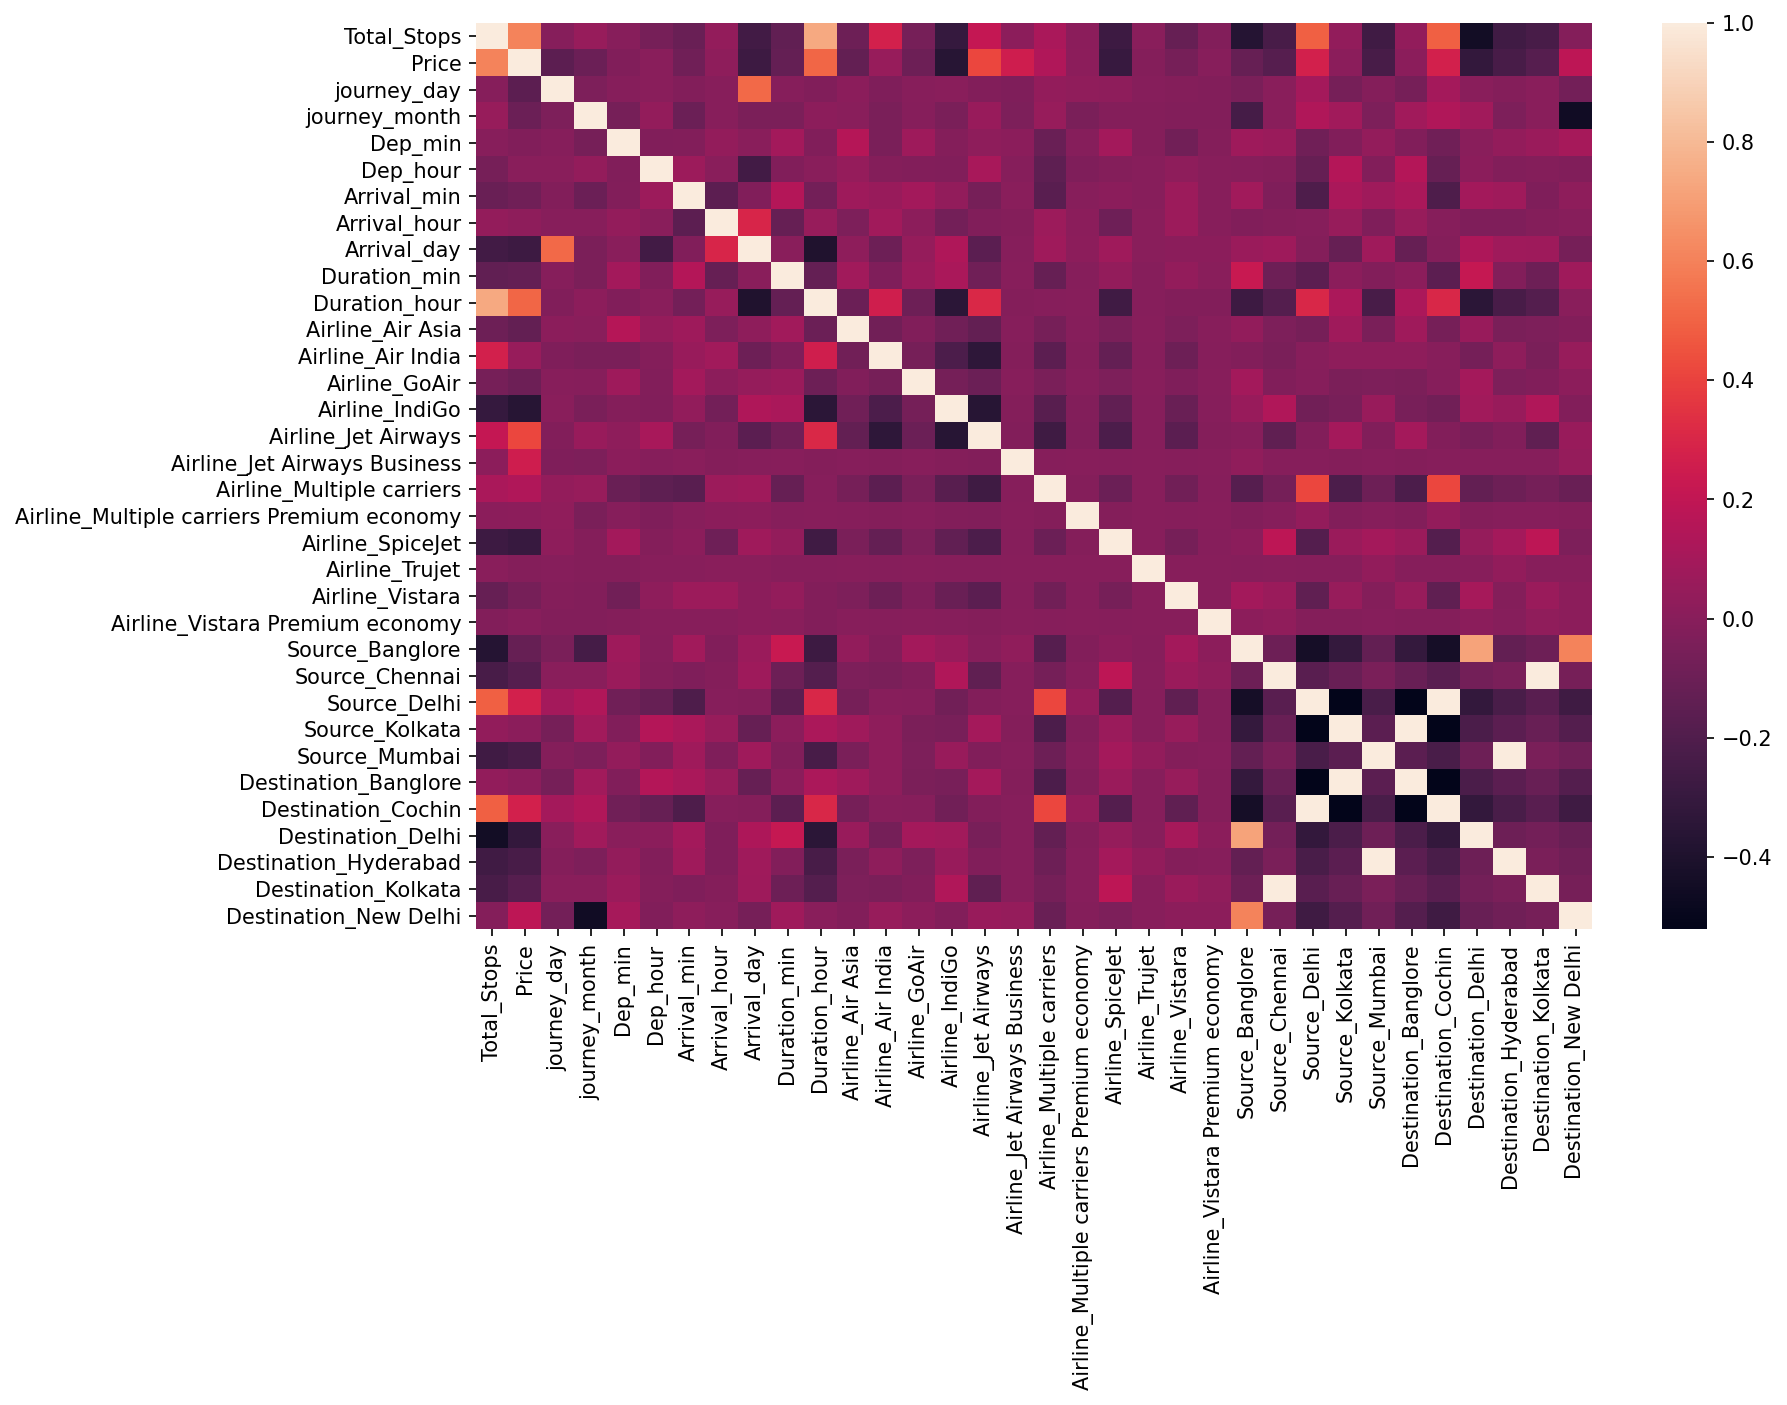

In [77]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(df_train.corr())

In [78]:
X = df_train.drop('Price',axis=1)
y = df_train['Price']

In [79]:
len(X.columns)

33

In [80]:
X.columns

Index(['Total_Stops', 'journey_day', 'journey_month', 'Dep_min', 'Dep_hour',
       'Arrival_min', 'Arrival_hour', 'Arrival_day', 'Duration_min',
       'Duration_hour', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

**Feature Selection**

In [81]:
from sklearn.ensemble import ExtraTreesRegressor

ex = ExtraTreesRegressor()
ex.fit(X,y)

ExtraTreesRegressor()

In [82]:
print(ex.feature_importances_)

[2.18288073e-01 1.25738110e-01 5.43271646e-02 2.10739622e-02
 2.26346898e-02 1.84857630e-02 2.53604750e-02 2.40096102e-02
 1.68384089e-02 1.33823262e-01 1.74179444e-03 1.03510301e-02
 1.77913687e-03 1.68310234e-02 1.37719100e-01 6.71116805e-02
 1.81818619e-02 8.68420421e-04 2.54588805e-03 8.80262321e-05
 5.22107130e-03 8.24631590e-05 8.85153190e-03 4.50319690e-04
 7.96177691e-03 1.90620805e-03 7.08047995e-03 1.77953598e-03
 9.37302673e-03 1.55438427e-02 7.14300211e-03 3.78760162e-04
 1.64305009e-02]


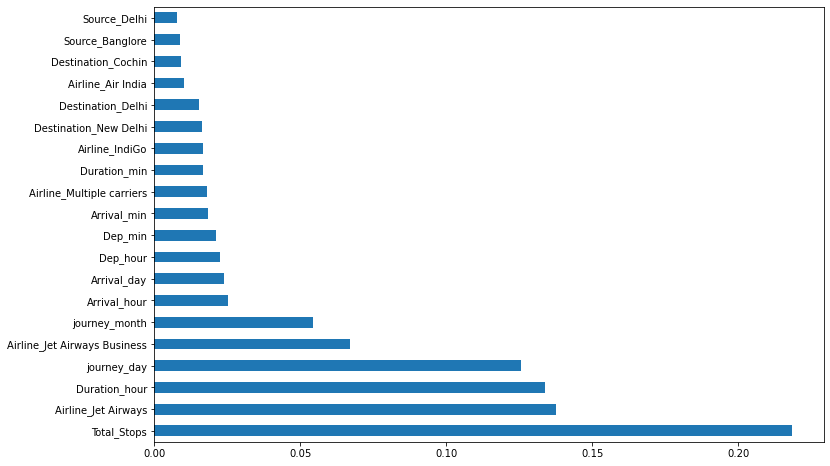

In [83]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(ex.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Train Test Split**

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Scaling data**

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [86]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf_model = RandomForestRegressor()

rf_model.fit(scaled_X_train, y_train)

RandomForestRegressor()

In [45]:
rf_model.score(scaled_X_train, y_train)

0.9583181215054396

In [46]:
y_pred = rf_model.predict(scaled_X_test)

In [47]:
mean_absolute_error(y_test, y_pred)

1222.4432048108677

In [65]:
rf_model.score(scaled_X_test, y_test)

0.8044850710228603

C:\Users\vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

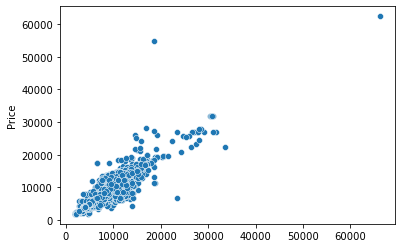

In [52]:
sns.scatterplot(y_pred, y_test)

## GredientBoost Regression

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()

gb_model.fit(scaled_X_train, y_train)

GradientBoostingRegressor()

In [50]:
gb_model.score(scaled_X_train, y_train)

0.7896009226459485

In [51]:
gb_model.score(scaled_X_test, y_test)

0.7715684301802681

## XGBoost Model

In [87]:
from xgboost import XGBRegressor

xg_model = XGBRegressor()

xg_model.fit(scaled_X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
xg_model.score(scaled_X_train, y_train)

0.9404282851732659

In [89]:
xg_model.score(scaled_X_test, y_test)

0.8335300746576167

In [90]:
y_pred = xg_model.predict(scaled_X_test)

In [91]:
mean_absolute_error(y_test, y_pred)

1192.5115520030959

## Hyper Parameter tunning

In [92]:
param_grid = {
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.08,0.1],
    'max_depth':[3,4,6,9],
}

In [93]:
grid_model = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [94]:
grid_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
y_grid_pred = grid_model.predict(scaled_X_test)

In [96]:
mean_absolute_error(y_test, y_grid_pred)

1159.46233153916

In [99]:
# grid_model.score(scaled_X_test, y_test)

-1159.46233153916

# Saving Model

In [68]:
import pickle
# open a file, where you ant to store the data
file = open('flight_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(grid_model, file)

In [71]:
model = open('flight_xgb.pkl','rb')
xgboost = pickle.load(model)

EOFError: Ran out of input

In [100]:
import joblib

In [101]:
joblib.dump(grid_model,'FlightPrice.pkl')

['FlightPrice.pkl']

In [102]:
xgb = joblib.load('FlightPrice.pkl')

In [103]:
y = xgb.predict(scaled_X_test)

In [104]:
mean_absolute_error(y_test, y)

1159.46233153916